In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm

/Users/vikasjaiswal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
file= pd.read_csv('labeled_data.csv')

# Logs 

In [3]:
logs= file[['timestamp', 'open', 'high', 'low', 'close', 'Signal']].rename(columns= {'Signal': 'signal'})

In [4]:
logs= logs[logs['signal']!=0]

# PNL

In [5]:
logs['entry_timestamp']= logs['timestamp']
logs['entry_price']= logs['open']
logs['exit_timestamp']= logs['timestamp'].shift(-1)
logs['exit_price']= logs['open'].shift(-1)
pnl= logs[logs['signal']>0][['entry_timestamp', 'entry_price', 'exit_timestamp', 'exit_price', 'signal']]
pnl

,entry_timestamp,entry_price,exit_timestamp,exit_price,signal
0,2019-01-03 04:30:00,3861.62,2019-01-05 22:30:00,3797.00,2
67,2019-01-05 23:30:00,3801.52,2019-01-07 07:30:00,3984.02,1
100,2019-01-07 08:30:00,3987.04,2019-01-13 21:30:00,3576.32,2
258,2019-01-13 22:30:00,3464.91,2019-01-14 20:30:00,3497.00,1
283,2019-01-14 23:30:00,3627.45,2019-02-07 22:30:00,3402.47,2
...,...,...,...,...,...
41946,2023-10-19 10:30:00,28286.75,2023-10-21 23:30:00,30146.67,1
42008,2023-10-22 00:30:00,30206.23,2023-10-22 18:30:00,29895.85,2
42027,2023-10-22 19:30:00,29945.40,2023-10-24 03:30:00,31629.99,1
42061,2023-10-24 05:30:00,33069.99,2023-10-24 20:30:00,34424.38,2


In [6]:
pnl['profit_per_btc'] = np.where(pnl['signal'] == 1, pnl['exit_price'] - pnl['entry_price'], 
                                  np.where(pnl['signal'] == 2, pnl['entry_price'] - pnl['exit_price'], None))

In [7]:
pnl['capital']= 1000

pnl['#units']= pnl['capital']/pnl['entry_price']

pnl['profit_per_capital']= pnl['#units']*pnl['profit_per_btc']
pnl['tnc_cost']= 1
pnl['profit_after_tnc']= pnl['profit_per_capital']- pnl['tnc_cost']

pnl['cumulative_profit']= pnl['profit_after_tnc'].cumsum()
pnl['roe_%']= (pnl['profit_after_tnc']/pnl['capital'])*100

pnl[:50]

,entry_timestamp,entry_price,exit_timestamp,exit_price,signal,profit_per_btc,capital,#units,profit_per_capital,tnc_cost,profit_after_tnc,cumulative_profit,roe_%
0,2019-01-03 04:30:00,3861.62,2019-01-05 22:30:00,3797.00,2,64.62,1000,0.258959,16.73391,1,15.73391,15.73391,1.573391
67,2019-01-05 23:30:00,3801.52,2019-01-07 07:30:00,3984.02,1,182.5,1000,0.263053,48.007113,1,47.007113,62.741023,4.700711
100,2019-01-07 08:30:00,3987.04,2019-01-13 21:30:00,3576.32,2,410.72,1000,0.250813,103.013765,1,102.013765,164.754787,10.201376
258,2019-01-13 22:30:00,3464.91,2019-01-14 20:30:00,3497.00,1,32.09,1000,0.288608,9.261424,1,8.261424,173.016211,0.826142
283,2019-01-14 23:30:00,3627.45,2019-02-07 22:30:00,3402.47,2,224.98,1000,0.275676,62.02153,1,61.02153,234.037741,6.102153
859,2019-02-07 23:30:00,3397.87,2019-02-08 21:30:00,3506.42,1,108.55,1000,0.294302,31.946484,1,30.946484,264.984225,3.094648
937,2019-02-11 05:30:00,3679.75,2019-02-17 15:30:00,3639.38,2,40.37,1000,0.271758,10.970854,1,9.970854,274.955079,0.997085
1092,2019-02-17 16:30:00,3626.76,2019-02-19 05:30:00,3897.35,1,270.59,1000,0.275728,74.609293,1,73.609293,348.564373,7.360929
1173,2019-02-21 01:30:00,3956.38,2019-02-22 20:30:00,3972.51,2,-16.13,1000,0.252756,-4.076959,1,-5.076959,343.487413,-0.507696
1217,2019-02-22 21:30:00,3954.63,2019-02-23 21:30:00,3941.99,1,-12.64,1000,0.252868,-3.196254,1,-4.196254,339.29116,-0.419625


In [8]:
net_profit= pnl['profit_after_tnc'].sum()
net_profit

27687.790117912435

In [9]:
print("Median_Points_Captured: ", pnl['profit_per_btc'].median())
print("Average_Points_Captured: ", pnl['profit_per_btc'].mean())
print("Maximum_Points_Captured: ", pnl['profit_per_btc'].max())
print("Minimum_Points_Captured: ", pnl['profit_per_btc'].min())
print("Total_Points_Captured: ", pnl['profit_per_btc'].sum())

Median_Points_Captured:  491.75
Average_Points_Captured:  1073.1843145743135
Maximum_Points_Captured:  11015.91
Minimum_Points_Captured:  -1518.020000000004
Total_Points_Captured:  743716.7299999992


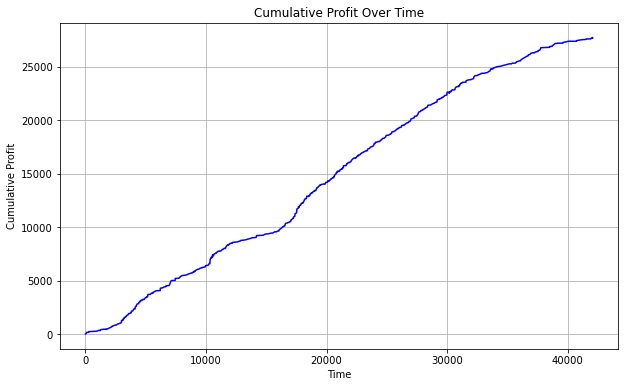

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Convert the index to a numpy array
index_array = np.array(pnl.index)

# Calculate cumulative profit
plt.figure(figsize=(10, 6))
plt.plot(pnl['cumulative_profit'], color='blue', linestyle='-')
plt.title('Cumulative Profit Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Profit')
plt.grid(True)
plt.show()


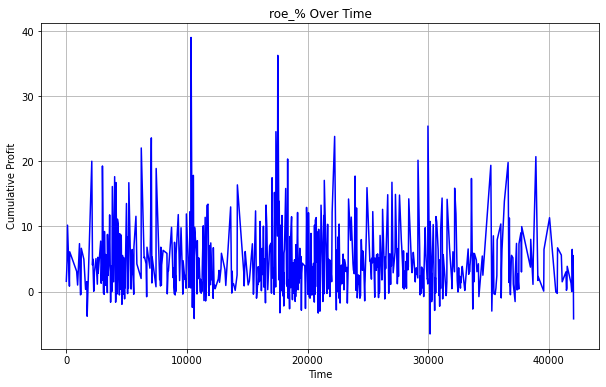

In [11]:
index_array = np.array(pnl.index)

# Calculate cumulative profit
plt.figure(figsize=(10, 6))
plt.plot(pnl['roe_%'], color='blue', linestyle='-')
plt.title('roe_% Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Profit')
plt.grid(True)
plt.show()

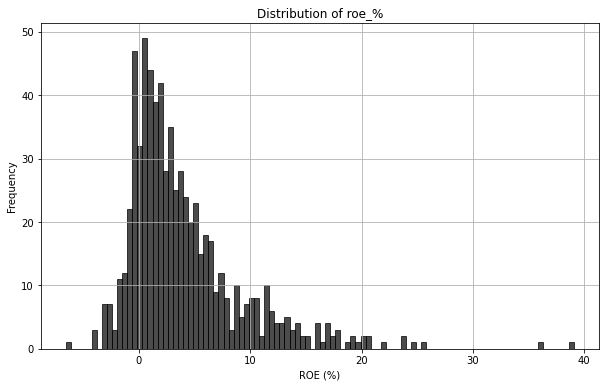

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(pnl['roe_%'], bins=100, color='black', edgecolor='black', alpha=0.7)
plt.title('Distribution of roe_%')
plt.xlabel('ROE (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

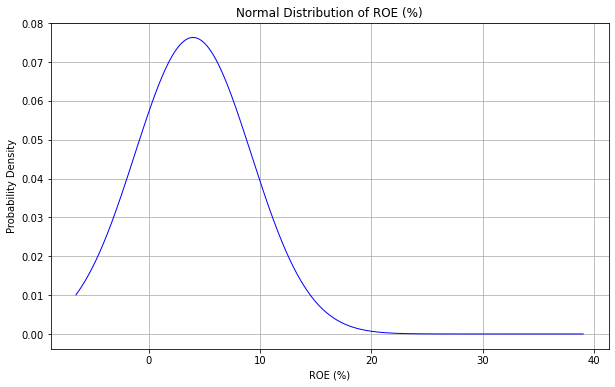

In [14]:
mu, std = np.mean(pnl['roe_%']), np.std(pnl['roe_%'])
xmin, xmax = np.min(pnl['roe_%']), np.max(pnl['roe_%'])
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, mu, std)

# Plot the normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, p, 'blue', linewidth=1)
plt.title('Normal Distribution of ROE (%)')
plt.xlabel('ROE (%)')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

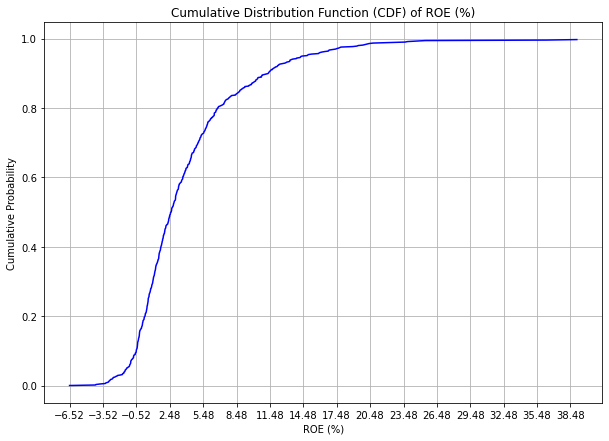

In [15]:
roe_sorted = np.sort(pnl['roe_%'])
cumulative_prob = np.arange(len(roe_sorted)) / len(roe_sorted)

# Plot CDF
plt.figure(figsize=(10, 7))
plt.plot(roe_sorted, cumulative_prob, color='blue', linestyle='-')
plt.title('Cumulative Distribution Function (CDF) of ROE (%)')
plt.xlabel('ROE (%)')
plt.ylabel('Cumulative Probability')
plt.grid(True)

# Increase the interval of x-axis
plt.xticks(np.arange(min(roe_sorted), max(roe_sorted)+1, 3.0))  # Adjust the step size as needed

plt.show()


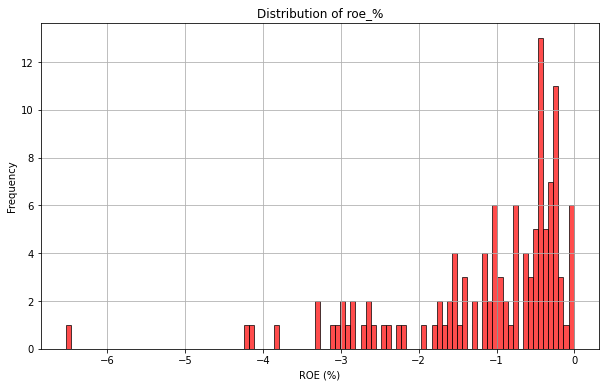

losing_roe_count 120
median_when_losing_roe -0.7578160025823838


In [16]:
roe_less_than_zero= pnl[pnl['roe_%']<0]
plt.figure(figsize=(10, 6))
plt.hist(roe_less_than_zero['roe_%'], bins=100, color='red', edgecolor='black', alpha=0.7)
plt.title('Distribution of roe_%')
plt.xlabel('ROE (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print("losing_roe_count", len(roe_less_than_zero))
print("median_when_losing_roe", roe_less_than_zero['roe_%'].median())


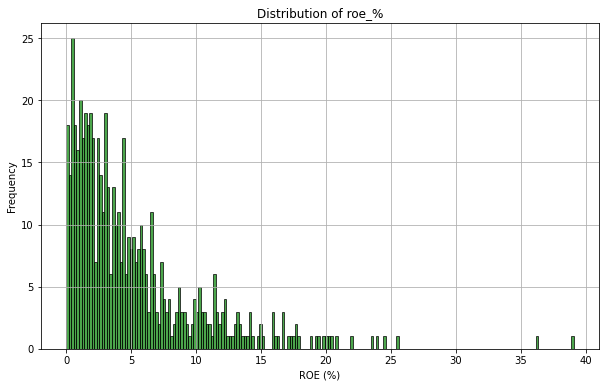

winning_roe_count 573
median_when_losing_roe 3.439768126927259


In [17]:
roe_greater_than_zero= pnl[pnl['roe_%']>0]
plt.figure(figsize=(10, 6))
plt.hist(roe_greater_than_zero['roe_%'], bins=200, color='green', edgecolor='black', alpha=0.7)
plt.title('Distribution of roe_%')
plt.xlabel('ROE (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print("winning_roe_count", len(roe_greater_than_zero))
print("median_when_losing_roe", roe_greater_than_zero['roe_%'].median())


# Accuracy Parameters

In [19]:
total_trades= len(pnl)
winning_trades= len(pnl[pnl['profit_after_tnc']>0])
losing_trades= total_trades - winning_trades
accuracy_perc= (winning_trades/total_trades)*100
max_profit= pnl['profit_after_tnc'].max()
min_profit= pnl['profit_after_tnc'].min()
net_profit= pnl['profit_after_tnc'].sum()
long_positions= len(pnl[pnl['signal']==1])
short_positions= len(pnl[pnl['signal']==2])
profit_long_only= pnl[pnl['signal']==1]['profit_after_tnc'].sum()
profit_short_only= pnl[pnl['signal']==2]['profit_after_tnc'].sum()

net_return_long= pnl[pnl['signal']==1]['roe_%'].sum()
net_return_short= pnl[pnl['signal']==2]['roe_%'].sum()

In [20]:
print("Total Trades:", total_trades)
print("Winning Trades:", winning_trades)
print("Losing Trades:", losing_trades)
print("Accuracy Percentage:", accuracy_perc)
print("Max Profit:", max_profit)
print("Min Profit:", min_profit)
print("Net Profit:", net_profit)
print("No of Long Positions:", long_positions)
print("No of Short Positions:", short_positions)

print("Net Profit Long:", profit_long_only)

print("Net Profit Short:", profit_short_only)

print("Net Return % Long:", net_return_long)
print("Net Return % Short:", net_return_short)




Total Trades: 694
Winning Trades: 573
Losing Trades: 121
Accuracy Percentage: 82.56484149855908
Max Profit: 390.45940408786294
Min Profit: -65.23495111628608
Net Profit: 27687.790117912435
No of Long Positions: 321
No of Short Positions: 373
Net Profit Long: 14984.242282862786
Net Profit Short: 12703.547835049652
Net Return % Long: 1498.4242282862813
Net Return % Short: 1270.3547835049665
